### Importing the libraries

In [6]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('D:\CDAC\College_Modules\Practice_Datasets\Airline_Passenger')
import seaborn as sns

In [83]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
 

### Loading the dataset

In [8]:
aps=pd.read_csv("train.csv",index_col=0)

### EDA

In [9]:
aps.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
aps.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [11]:
aps.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

### Checking null values

In [12]:
aps.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [13]:
aps.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Checking for duplicated values

In [14]:
aps.duplicated().sum()

0

In [15]:
#Dropping the null values 
aps.dropna(inplace=True)

### Checking for outliers

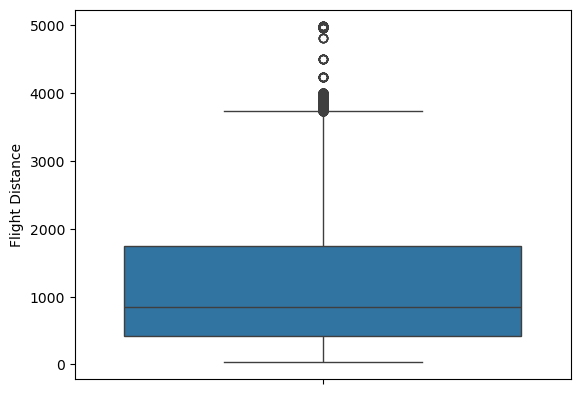

In [16]:
sns.boxplot(data=aps,y= 'Flight Distance')
plt.show()

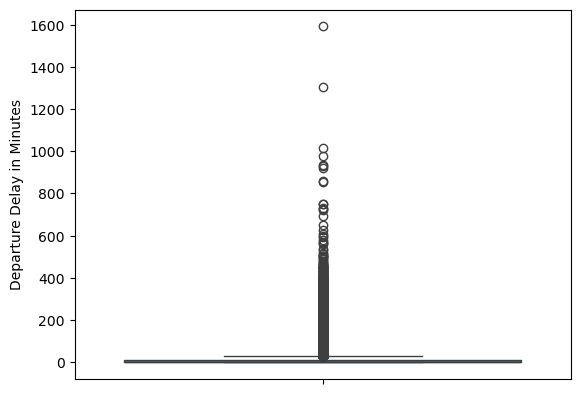

In [17]:
sns.boxplot(data=aps,y= 'Departure Delay in Minutes')
plt.show()
#Has huge number of outliers so we will drop the column

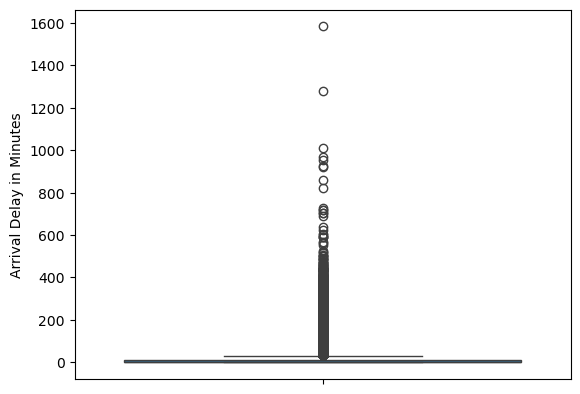

In [18]:
sns.boxplot(data=aps,y= 'Arrival Delay in Minutes')
plt.show()
#Has huge number of outliers so we will drop the column

### Making a copy of dataset

In [19]:
aps_copy=aps.copy()

In [20]:
aps_copy=aps_copy.drop(['Departure Delay in Minutes','Arrival Delay in Minutes','id'],axis=1)

In [21]:
aps_copy

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,5,3,3,4,4,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,2,2,3,1,4,2,3,2,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,4,5,5,5,5,5,5,5,4,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,1,5,4,3,2,4,5,5,4,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,1,1,4,5,1,5,4,1,neutral or dissatisfied


In [22]:
aps_copy['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [23]:
aps_copy['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [24]:
aps_copy['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

### Univariant Analysis

<Axes: xlabel='Age', ylabel='Count'>

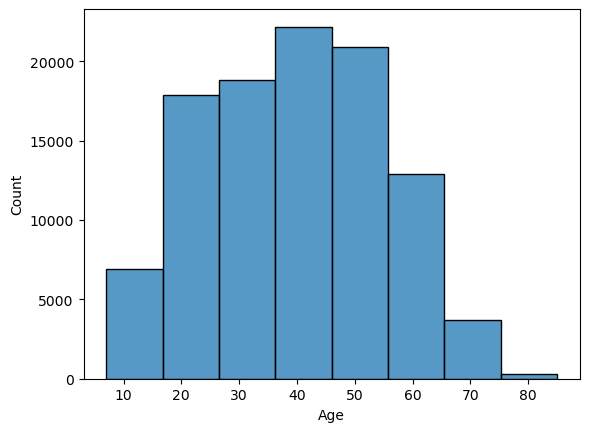

In [25]:
sns.histplot(data = aps_copy, x = 'Age', binwidth = 10)

### Function for Univariant Anaylsis

In [26]:
def countplot(feature_name, figure_color, row, column):
    plt.rcParams['figure.figsize'] = [7,10]
    plt.rcParams['figure.autolayout'] = True
    sns.countplot(aps, x = feature_name, color = figure_color, ax = axes[row][column])

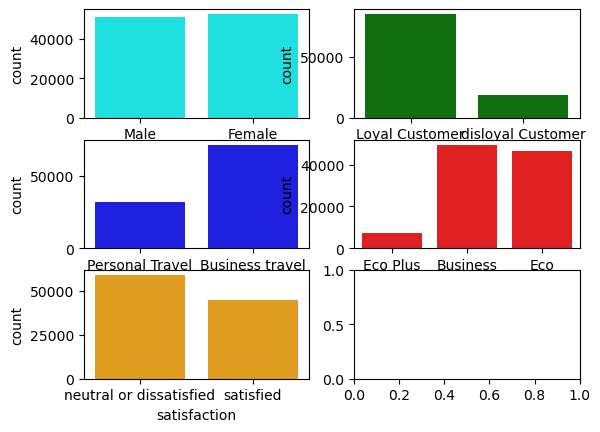

In [27]:
# f is overall reference to the figure and axes states how many subplots to plot (rows,columns)
f, axes = plt.subplots(3,2)
countplot("Gender", 'cyan', 0, 0,)
countplot("Customer Type", 'green', 0, 1)
countplot("Type of Travel", 'blue', 1, 0)
countplot("Class", 'red', 1, 1)
countplot("satisfaction",'orange', 2, 0)

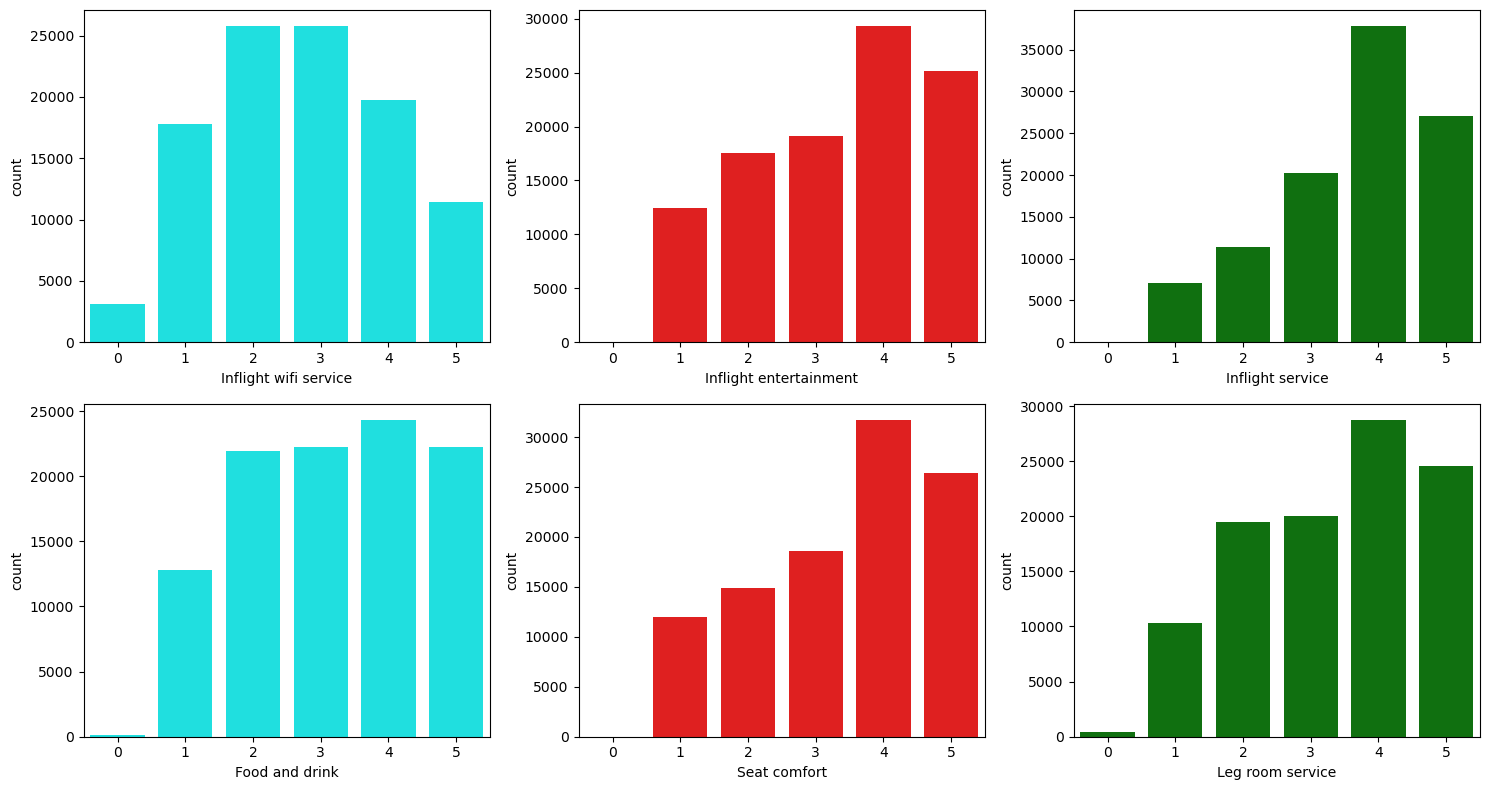

In [28]:
plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['figure.autolayout'] = True
f1, axes = plt.subplots(2,3)
countplot('Inflight wifi service', 'cyan', 0, 0)
countplot('Inflight entertainment', 'red', 0, 1)
countplot('Inflight service', 'green', 0, 2)
countplot('Food and drink', 'cyan', 1, 0)
countplot('Seat comfort', 'red', 1, 1)
countplot('Leg room service', 'green', 1, 2)

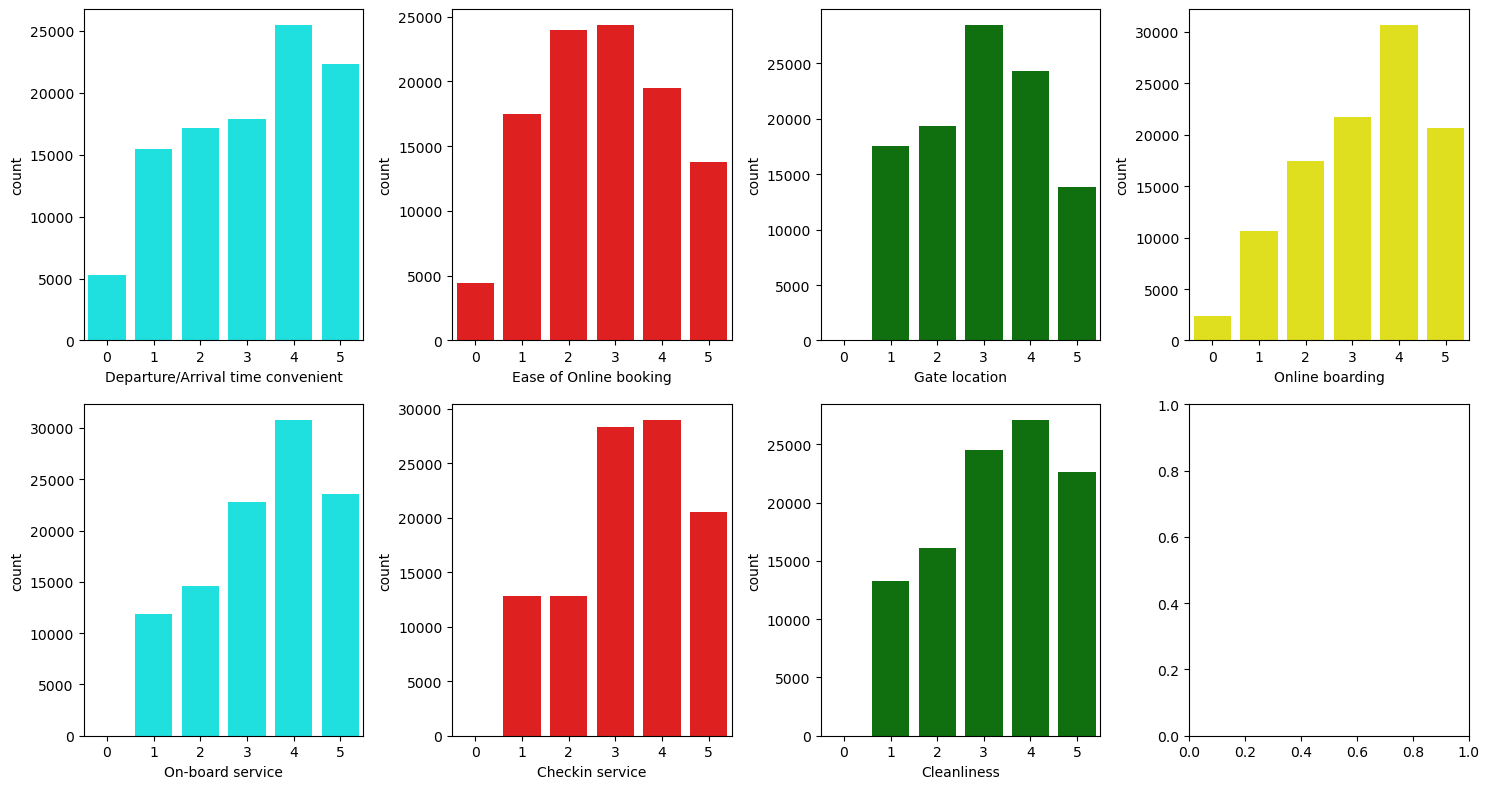

In [29]:
plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['figure.autolayout'] = True
f1, axes = plt.subplots(2,4)
countplot('Departure/Arrival time convenient', 'cyan', 0, 0)
countplot('Ease of Online booking', 'red', 0, 1)
countplot('Gate location', 'green', 0, 2)
countplot('Online boarding', 'yellow', 0, 3)
countplot('On-board service', 'cyan', 1, 0)
countplot('Checkin service', 'red', 1, 1)
countplot('Cleanliness', 'green', 1, 2)


In [30]:
aps_copy.to_csv('C:/Users/swara/CDAC/PML/Mini Project/Airline_Passenger_Satisfaction') 

### Bivariant Analysis

#### Corelation 

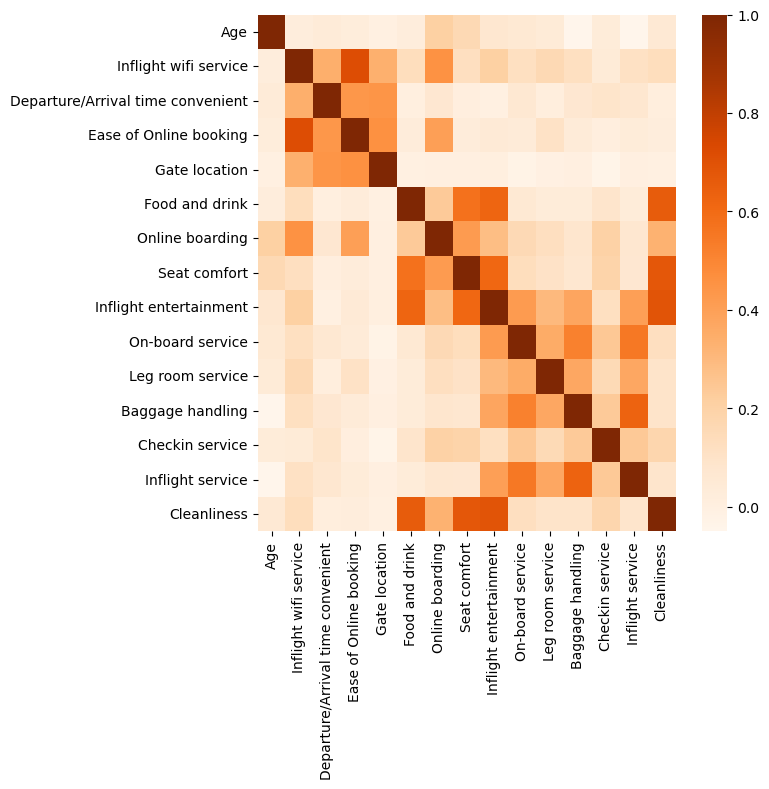

In [31]:
aps_corr=aps_copy.drop(['Gender','Customer Type','Type of Travel','Class','Flight Distance', 'satisfaction'], axis = 1)
plt.figure(figsize = [8,8])
sns.heatmap(data=aps_corr.corr(),cmap="Oranges")
plt.show()

1.Cleanliness is highly corelated with Food and Drink,seat comfort and Inflight Entertainment.


2. Inflight Entertainment is highly corelated Food anf Drink,Seat Comfort and Inflight  Service.

In [32]:
def countplot1(featurename,fig_colour,row,col):
    ax=sns.countplot(data=aps,x=featurename,color=fig_colour,ax = axes[row][col],hue='satisfaction',palette=sns.color_palette("Paired"))
    for container in ax.containers:
        ax.bar_label(container)

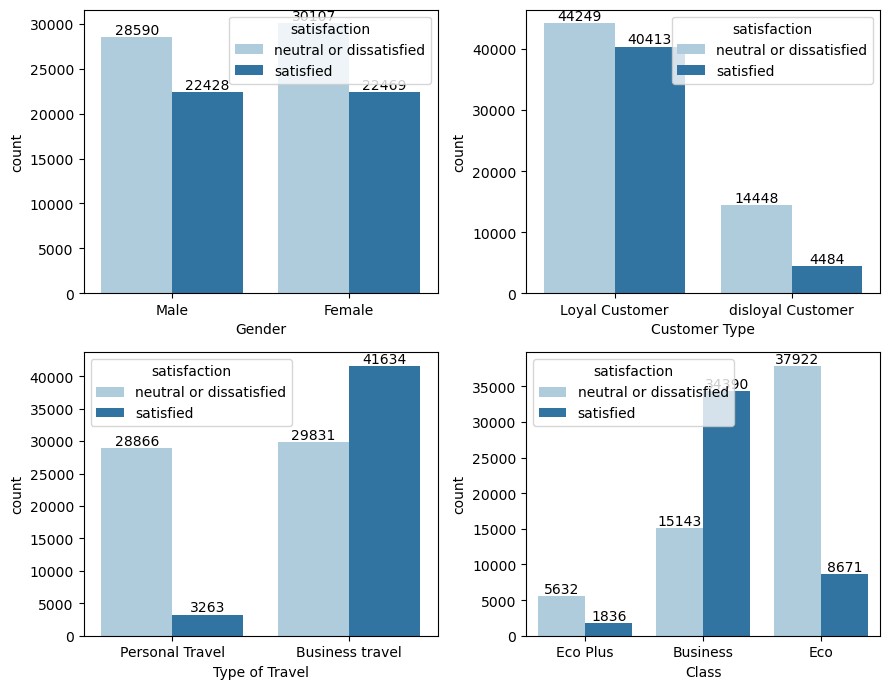

In [33]:
plt.rcParams['figure.figsize'] = [9,7]
plt.rcParams['figure.autolayout'] = True
# f is overall reference to the figure and axes states how many subplots to plot (rows,columns)
f, axes = plt.subplots(2,2)
countplot1("Gender", 'cyan', 0, 0,)
countplot1("Customer Type", 'green', 0, 1)
countplot1("Type of Travel", 'blue', 1, 0)
countplot1("Class", 'red', 1, 1)
#countplot("satisfaction",'orange', 2, 0)

#### Seperating dependent and independent columns
#### Droping the columns that are not required

In [34]:
#getting the column names
aps.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [35]:
X=aps.drop(['id','satisfaction'],axis=1)
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,0.0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,0.0
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,14.0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,0.0


In [36]:
X.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [37]:
y=aps['satisfaction']
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103594, dtype: object

In [38]:
#generating the dummy values
dum_X=pd.get_dummies(X,drop_first=True)
dum_X

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,18.0,True,False,True,False,True
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,6.0,True,True,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,0.0,False,False,False,False,False
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,9.0,False,False,False,False,False
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,0.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,2,3,2,3,0.0,False,True,False,True,False
103900,49,2347,4,4,4,4,2,4,5,5,...,5,5,4,0,0.0,True,False,False,False,False
103901,30,1995,1,1,1,3,4,1,5,4,...,5,5,4,7,14.0,True,True,False,False,False
103902,22,1000,1,1,1,5,1,1,1,1,...,5,4,1,0,0.0,False,True,False,True,False


#### Train Test Split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(dum_X,y,test_size=0.3,stratify=y,random_state=23)

In [40]:
X_train

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
34333,24,585,5,5,5,4,5,5,5,5,...,3,5,5,61,64.0,True,True,False,False,False
95023,59,332,2,2,2,2,5,4,5,5,...,5,5,3,0,0.0,True,False,False,False,False
10326,35,337,2,5,2,3,4,2,1,4,...,3,5,4,5,9.0,True,False,True,True,False
71684,27,675,3,3,3,3,3,3,3,4,...,3,2,3,157,147.0,True,True,False,True,False
34847,34,456,2,3,3,3,2,2,2,2,...,3,4,2,1,0.0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68214,24,583,4,0,4,2,4,4,4,4,...,5,5,4,0,0.0,True,True,False,True,False
70076,48,1986,3,4,4,2,3,3,3,3,...,3,5,3,0,17.0,True,True,False,False,False
22519,37,3490,3,3,3,3,5,3,4,4,...,1,4,5,7,0.0,False,False,False,False,False
65106,57,612,2,4,4,4,2,2,2,2,...,3,1,2,30,36.0,True,False,False,True,False


In [41]:
X_test

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
55057,47,895,3,3,3,3,4,4,5,5,...,4,5,5,0,0.0,True,False,False,False,False
84953,39,931,4,5,5,4,4,5,4,4,...,5,4,4,0,0.0,True,False,True,True,False
62208,59,978,1,1,1,1,2,4,5,4,...,3,4,3,0,0.0,False,False,False,False,False
33784,38,3633,3,3,4,3,2,4,1,3,...,3,3,1,0,0.0,False,False,False,False,False
83359,52,310,2,5,4,2,2,4,2,2,...,3,4,2,0,0.0,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,50,100,1,2,1,3,2,1,2,2,...,4,4,2,0,10.0,False,True,False,True,False
28031,37,347,5,3,3,3,5,5,5,5,...,5,5,5,0,0.0,False,False,False,True,False
15822,36,986,4,4,4,3,4,4,4,4,...,3,5,4,40,27.0,True,False,True,True,False
7715,38,861,1,4,5,4,1,1,1,1,...,2,3,1,7,0.0,True,False,False,False,True


In [42]:
y_train

34333                  satisfied
95023                  satisfied
10326    neutral or dissatisfied
71684    neutral or dissatisfied
34847    neutral or dissatisfied
                  ...           
68214                  satisfied
70076    neutral or dissatisfied
22519                  satisfied
65106                  satisfied
65218    neutral or dissatisfied
Name: satisfaction, Length: 72515, dtype: object

In [43]:
y_test

55057                   satisfied
84953     neutral or dissatisfied
62208                   satisfied
33784                   satisfied
83359     neutral or dissatisfied
                   ...           
1907      neutral or dissatisfied
28031                   satisfied
15822     neutral or dissatisfied
7715      neutral or dissatisfied
101198    neutral or dissatisfied
Name: satisfaction, Length: 31079, dtype: object

In [44]:
mm_scaler=MinMaxScaler()

In [45]:
X_train_scaled=mm_scaler.fit_transform(X_train)

In [46]:
X_test_scaled=mm_scaler.fit_transform(X_test)

#### Training the model 

In [67]:
acc_basic_model={}
##Defining a function for base model
def base_model(model_name,x_tr,y_tr,x_tst,y_tst,str1):
    model=model_name()
    model.fit(x_tr,y_tr)
    y_pred=model.predict(x_tst)
    acc=accuracy_score(y_tst,y_pred)
    print(f"Accuracy score for {str1} : {acc}")
    acc_basic_model[str1] = acc

#### Implenting Logistic Regression

In [68]:
base_model(LogisticRegression,X_train_scaled,y_train,X_test_scaled,y_test,"Logistic Regression")

Accuracy score for Logistic Regression : 0.8764439010264166


####  Implenting KNN

In [69]:
base_model(KNN,X_train_scaled,y_train,X_test_scaled,y_test,"KNN")

Accuracy score for KNN : 0.9240966569065929


#### Implenting Navie Bayes

In [70]:
base_model(GaussianNB,X_train_scaled,y_train,X_test_scaled,y_test,"GaussianNB")

Accuracy score for GaussianNB : 0.857041732359471


#### Implenting Decision Tree

In [71]:
base_model(DecisionTreeClassifier,X_train_scaled,y_train,X_test_scaled,y_test,"DecisionTree")

Accuracy score for DecisionTree : 0.9156987033044821


#### Impementing Linear Discriminent Analysis

In [72]:
base_model(LinearDiscriminantAnalysis,X_train_scaled,y_train,X_test_scaled,y_test,"LDA")

Accuracy score for LDA : 0.8746098651822775


#### Implementing Support Vector Machine

In [73]:
base_model(SVC,X_train_scaled,y_train,X_test_scaled,y_test,"SVM")

Accuracy score for SVM : 0.9478104186106374


#### Implementing Random Forest 

In [74]:
base_model(RandomForestClassifier,X_train_scaled,y_train,X_test_scaled,y_test,"RandomForest")

Accuracy score for RandomForest : 0.9554361465941633


#### Comparing the basic models

In [75]:
#displaying the dictionary 
acc_basic_model

{'Logistic Regression': 0.8764439010264166,
 'KNN': 0.9240966569065929,
 'GaussianNB': 0.857041732359471,
 'DecisionTree': 0.9156987033044821,
 'LDA': 0.8746098651822775,
 'SVM': 0.9478104186106374,
 'RandomForest': 0.9554361465941633}

In [77]:
# Creating DataFrame of all Scores
acc_df = pd.DataFrame(list(acc_basic_model.items()), columns = ['model', 'accuracy'])
acc_df

,model,accuracy
0,Logistic Regression,0.876444
1,KNN,0.924097
2,GaussianNB,0.857042
3,DecisionTree,0.915699
4,LDA,0.874610
5,SVM,0.947810
6,RandomForest,0.955436


In [80]:
# sorting the dataframe in descending order of accuracy
acc_df.sort_values(by = ['accuracy'], inplace = True)
acc_df

,model,accuracy
2,GaussianNB,0.857042
4,LDA,0.874610
0,Logistic Regression,0.876444
3,DecisionTree,0.915699
1,KNN,0.924097
5,SVM,0.947810
6,RandomForest,0.955436


#### Plotting the Graph

<Figure size 400x200 with 0 Axes>

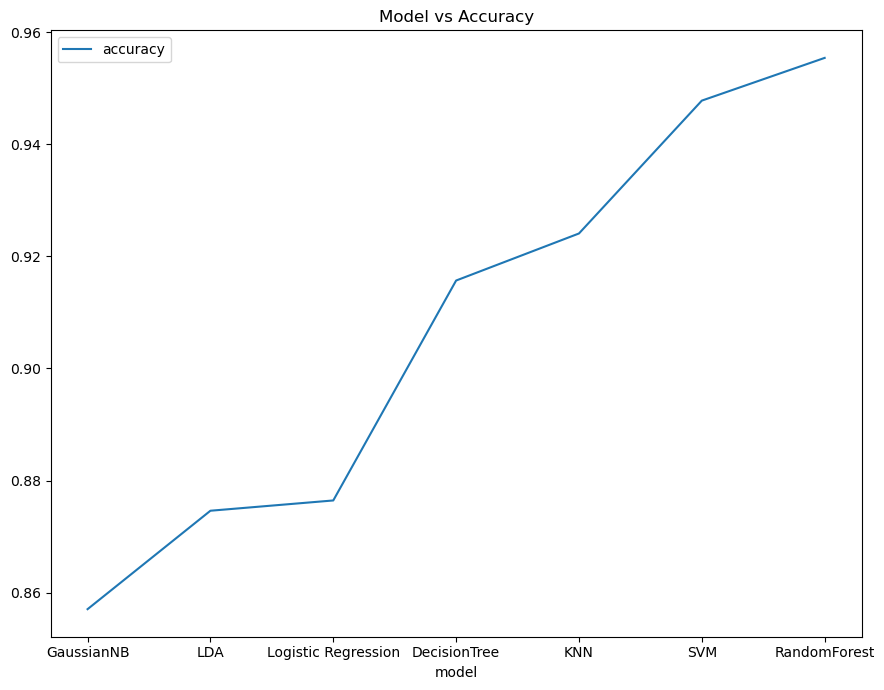

In [81]:
# plotting a graph of accuracy
plt.figure(figsize=(4, 2))  
acc_df.plot(x='model', y='accuracy', title='Model vs Accuracy')
plt.tight_layout()
plt.show()

#### Fine-tunning best model(Random Forest)

In [82]:
#Training the model
rf=RandomForestClassifier(random_state=23)

In [84]:
# defining the folds using Stratified Kfold
kfold= StratifiedKFold(n_splits = 5, shuffle = True, random_state = 23)

In [86]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 23,
 'verbose': 0,
 'warm_start': False}

In [90]:
# defining the parameters to be tuned
params = {
    'n_estimators': [5, 25, 50,75,150],
    'max_depth': [3, 5, 7,9,11],
    'min_samples_split': [2, 5, 8, 11, 15],
    'min_samples_leaf': [1, 2, 4, 8, 10] 
}

In [91]:
# defining the grid
gcv = GridSearchCV(rf, param_grid = params, cv = kfold, scoring = 'accuracy', verbose = 3)

In [92]:
# fitting the model
gcv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.877 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.869 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.878 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.870 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.882 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.886 total time=   0.4s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.884 total time=   0.4s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.887 total time=   0.4s
[CV 4/5] END 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 4, 8, 10],
                         'min_samples_split': [2, 5, 8, 11, 15],
                         'n_estimators': [5, 25, 50, 75, 150]},
             scoring='accuracy', verbose=3)

In [93]:
# best params and score for the tuned model
print("Best Params: ", gcv.best_params_)
print('Best Score: ', gcv.best_score_)

Best Params:  {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 25}
Best Score:  0.9476246293870233
